##**Tải data vào colab**

In [85]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [86]:
!unzip /content/gdrive/Shareddrives/nhan_dien_dac_diem_khuon_mat/gender_data.zip -d "/content"

Archive:  /content/gdrive/Shareddrives/nhan_dien_dac_diem_khuon_mat/gender_data.zip
replace /content/Training/female/131422.jpg.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## **Import thư viện**

In [87]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob
import seaborn as sn
from tqdm import tqdm

## **Chia 2 thư mục train và test**

In [88]:
train_dir = '/content/Training'
test_dir = '/content/Validation'
categories = ["female", "male"]
img_size = 50

In [89]:
X_train_label = []
X_train_list = []
X_test_label = []
X_test_list = []

## **Load data và preprocessing**

In [90]:
female_train_list = glob.glob(train_dir+"/"+categories[0]+"/*")
male_train_list = glob.glob(train_dir+"/"+categories[1]+"/*")
for name in female_train_list:
  X_train_label.append(0)
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(img_size,img_size))
  X_train_list.append((img))
for name in male_train_list:
  X_train_label.append(1)
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(img_size,img_size))
  X_train_list.append((img))

In [ ]:
print(len(X_train_list))
print(len(X_train_label))

47009
47009


In [91]:
female_test_list = glob.glob(test_dir+"/"+categories[0]+"/*")
male_test_list = glob.glob(test_dir+"/"+categories[1]+"/*")
for name in female_test_list:
  X_test_label.append(0)
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(img_size,img_size))
  X_test_list.append((img))
for name in male_test_list:
  X_test_label.append(1)
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(img_size,img_size))
  X_test_list.append((img))

In [92]:
print(len(X_test_list))
print(len(X_test_label))

11649
11649


In [93]:
X_train = np.array(X_train_list)
y_train = np.array(X_train_label)

print(X_train.shape)
print(y_train.shape)

(47009, 50, 50)
(47009,)


In [94]:
X_test = np.array(X_test_list)
y_test = np.array(X_test_label)

print(X_test.shape)
print(y_test.shape)

(11649, 50, 50)
(11649,)


## **Duỗi vector, chuẩn hoá input**

In [95]:
X_train_scaled = np.array([x.ravel()/255. for x in X_train])
X_test_scaled = np.array([x.ravel()/255. for x in X_test])

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(47009, 2500)
(11649, 2500)


## **Chuẩn hoá output**

In [96]:
y_train_scaled = np.array([y for y in y_train])
y_test_scaled = np.array([y for y in y_test])

## **Xây dựng và huấn luyện mô hình**

In [ ]:
# Hàm sigmoid
def g(z):
  z = np.float64(z)
  return np.exp(z)/(1+np.exp(z))
# Hàm xác suất dự đoán
def predict_prob(X,w):
  z=np.dot(X,w)
  a = g(z)
  return a
# Hàm dự đoán binary
def predict(X,w):
  y_hat = predict_prob(X,w)
  y_hat[y_hat >=0.5] = 1
  y_hat[y_hat <0.5] = 0
  return y_hat
# Hàm loss
def loss(X,y,w):
  y_hat = predict_prob(X,w)
  theta=1e-4
  l = y*np.log(y_hat+theta) + (1-y)*np.log(1-y_hat+theta)
  return -np.mean(l)
# Hàm grad
def grad(X,y,w):
  y_hat = predict_prob(X,w)
  delta = y_hat - y
  dw = np.dot(X.T,delta)
  return dw
# Hàm gradient descent
def gradient_descent(X,y,lr = 1e-7, epochs = 1000):
  w = np.zeros((X.shape[1],1))
  losses = []
  for i in range(epochs):
    dw = grad(X,y,w)
    w -= lr*dw
    a = loss(X,y,w)
    losses.append(a)
  return losses,w

## **Vẽ đồ thị hàm loss ban đầu**

In [ ]:
loss,w = gradient_descent(X_train_scaled,np.array([y_train_scaled]).T)

Text(0, 0.5, 'loss')

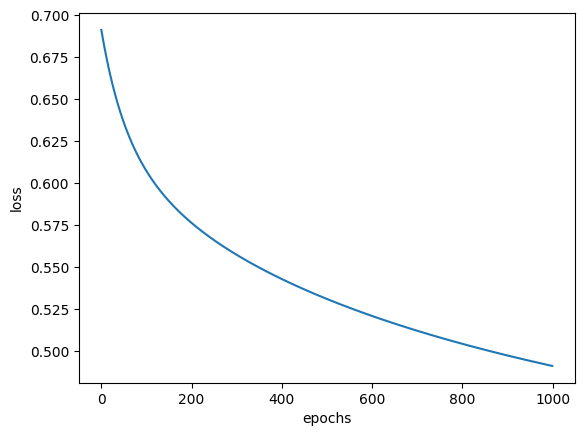

In [ ]:
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("loss")

In [117]:
print(f"Final loss: {loss[-1]}")

Final loss: 0.4909951632320063


In [ ]:
# Tính y dự đoán
y_hat = predict(X_test_scaled,w)

## **Hàm dự đoán**

In [ ]:
def evaluation(y_true, y_pred):
    tp = tn = fp = fn = 0 
    # So sánh y_true và y_pred
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1: 
            tp += 1 
        elif y_true[i] == 0 and y_pred[i] == 0: 
            tn += 1 
        elif y_true[i] == 0 and y_pred[i] == 1: 
            fp += 1 
        elif y_true[i] == 1 and y_pred[i] == 0: 
            fn += 1 
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    # Tính true positive, true negative, false positive, false negative
    print(f"tp = {tp}, tn = {tn}, fp = {fp}, fn = {fn}")
    # Tính Accuracy, Precision, Recall, F1 score
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"F1 Score = {f1_score}")

## **Đánh giá accuracy, recall, precision, f1-score**

In [ ]:
evaluation(y_test, y_hat)

tp = 4491, tn = 4615, fp = 1226, fn = 1317
Accuracy = 0.7816979998283115
Precision = 0.785551862865139
Recall = 0.7732438016528925
F1 Score = 0.779349240780911


# **Ứng dụng phương pháp regularization L2 vào mô hình**

In [112]:
# Hàm sigmoid
def g(z):
    z = np.float64(z)
    return np.exp(z)/(1+np.exp(z))
# Hàm xác suất dự đoán
def predict_prob(X, w):
    z = np.dot(X, w)
    a = g(z)
    return a
# Hàm dự đoán binary
def predict(X, w):
    y_hat = predict_prob(X, w)
    y_hat[y_hat >= 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    return y_hat
# Hàm loss, có bổ sung L2 regularization
def loss(X, y, w, lambda_):
    y_hat = predict_prob(X, w)
    theta = 1e-4
    l = y*np.log(y_hat+theta) + (1-y)*np.log(1-y_hat+theta)
    l2 = lambda_ * np.sum(w**2)
    return -np.mean(l) + l2/(2*X.shape[0])
# Hàm gradient, có bổ sung L2 regularization
def grad(X, y, w, lambda_):
    y_hat = predict_prob(X, w)
    delta = y_hat - y
    dw = np.dot(X.T, delta)
    return dw
# Hàm gradient descent
def gradient_descent(X, y, lr=1e-7, epochs=1000, lambda_=1e-2):
    w = np.zeros((X.shape[1], 1))
    losses = []
    for i in range(epochs):
        dw = grad(X, y, w, lambda_)
        w -= lr * dw
        a = loss(X, y, w, lambda_)
        losses.append(a)
    return losses, w

## **Vẽ đồ thị Loss mới**

In [113]:
loss,w = gradient_descent(X_train_scaled,np.array([y_train_scaled]).T)

Text(0, 0.5, 'loss')

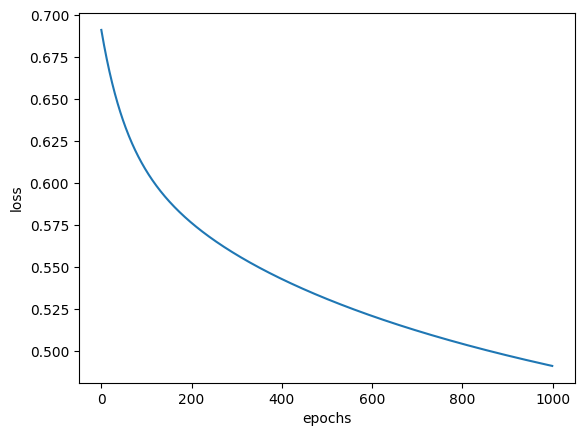

In [ ]:
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("loss")

In [123]:
print(f"Final loss: {loss[-1]}")

Final loss: 0.4909951632320063


In [124]:
# Tính y dự đoán
y_hat = predict(X_test_scaled,w)

### **Tính Accuracy, recall, precision, f1-score**

In [129]:
evaluation(y_test, y_hat)

tp = 4491, tn = 4615, fp = 1226, fn = 1317
Accuracy = 0.7816979998283115
Precision = 0.785551862865139
Recall = 0.7732438016528925
F1 Score = 0.779349240780911


## **Vẽ confusion matrix dùng thư viện sklearn**


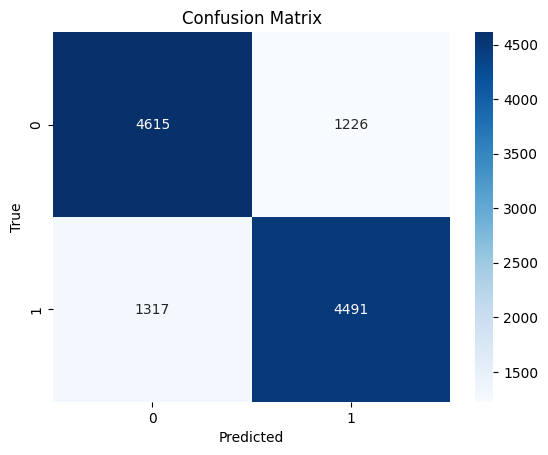

In [ ]:
import sklearn.metrics

# Tạo confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_hat)

# Vẽ confusion matrix
plt.figure()
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## **Code và thực thi hàm batch_generator tối ưu hàm loss**

In [97]:
def batch_generator(X, y, batch_size):
    # Chia nhiều batches để huấn luyện
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)

    n_batch = len(idx) // batch_size
    for i in range(n_batch):
        i_start = i * batch_size
        i_stop = min((i + 1) * batch_size, len(idx))
        yield X[idx[i_start:i_stop], :], y[idx[i_start:i_stop],:]

# Hàm sigmoid
def g(z):
    z = np.float64(z)
    return np.exp(z) / (1 + np.exp(z))

# Hàm xác suất dự đoán
def predict_prob(X, w):
    z = np.dot(X, w)
    a = g(z)
    return a

# Hàm dự đoán binary
def predict(X, w):
    y_hat = predict_prob(X, w)
    y_hat[y_hat >= 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    return y_hat

# Hàm loss, có bổ sung L2 regularization
def loss(X, y, w, lambda_):
    y_hat = predict_prob(X, w)
    theta = 1e-5
    l = y*np.log(y_hat+theta) + (1-y)*np.log(1-y_hat+theta)
    l2 = lambda_ * np.sum(w**2)
    return -np.mean(l) + l2/(2*X.shape[0])

# Hàm gradient, có bổ sung L2 regularization
def grad(X, y, w, lambda_):
    y_hat = predict_prob(X, w)
    delta = y_hat - y
    dw = np.dot(X.T, delta)
    return dw

# Hàm gradient descent
def gradient_descent(X, y, lr=1e-6, epochs=1000, lambda_=1e-2):
    w = np.zeros((X.shape[1], 1))
    losses = []
    for i in range(epochs):
        for X_batch, y_batch in batch_generator(X, y, batch_size):
            dw = grad(X_batch, y_batch, w, lambda_)
            w -= lr * dw
        a = loss(X, y, w, lambda_)
        losses.append(a)
        # print(losses[-1])
    return losses, w

batch_size = 50
lr = 1e-7
epochs =1000
lambda_ = 1e-5
losses, weight = gradient_descent(X_train_scaled, np.array([y_train_scaled]).T, lr, epochs, lambda_)

print("Final loss:", losses[-1])


Final loss: 0.4911840690638267


Text(0, 0.5, 'loss')

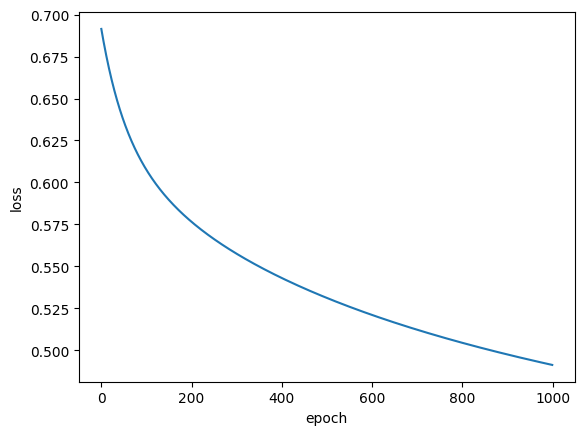

In [126]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")

In [127]:
y_pred = predict(X_test_scaled,weight)

In [128]:
evaluation(y_test_scaled,y_pred)

tp = 4491, tn = 4615, fp = 1226, fn = 1317
Accuracy = 0.7816979998283115
Precision = 0.785551862865139
Recall = 0.7732438016528925
F1 Score = 0.779349240780911


# **Hàm binary1 bổ sung bias**

In [102]:
class binary1:
    def __init__(self, lr = 1e-6, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
    # Hàm thêm bias vào tập X
    def addBias(self,X):
        bias = np.ones((X.shape[0],1))
        X = np.hstack((bias,X));
        return X
    # Hàm sigmoid
    def g(z):
        z = np.float64(z)
        return np.exp(z)/(1+np.exp(z))
    # Hàm xác suất dự đoán
    def predict_prob(self,X, w):
        z = np.dot(X, w)
        a = g(z)
        return a
    # Hàm dự đoán binary
    def predict(self,X, w):
        y_hat = self.predict_prob(X, w)
        y_hat[y_hat >= 0.5] = 1
        y_hat[y_hat < 0.5] = 0
        return y_hat
    # Hàm loss
    def loss(self,X, y, w, lambda_):
        y_hat = self.predict_prob(X, w)
        theta = 1e-4
        l = y*np.log(y_hat+theta) + (1-y)*np.log(1-y_hat+theta)
        return -np.mean(l)
    # Hàm gradient
    def grad(self,X, y, w, lambda_):
        y_hat = self.predict_prob(X, w)
        delta = y_hat - y
        dw = np.dot(X.T, delta)
        return dw
    # Hàm gradient descent
    def gradient_descent(self,X, y, lr=1e-7, epochs=1000, lambda_=0.01):
        w = np.zeros((X.shape[1], 1))
        losses = []
        for i in range(epochs):
            dw = self.grad(X, y, w, lambda_)
            w -= lr * dw
            a = self.loss(X, y, w, lambda_)
            losses.append(a)
        return losses, w

In [103]:
model = binary1()
X_train_scaled_bias = model.addBias(X_train_scaled)
X_test_scaled_bias = model.addBias(X_test_scaled)
loss,w = model.gradient_descent(X_train_scaled_bias,np.array([y_train_scaled]).T)

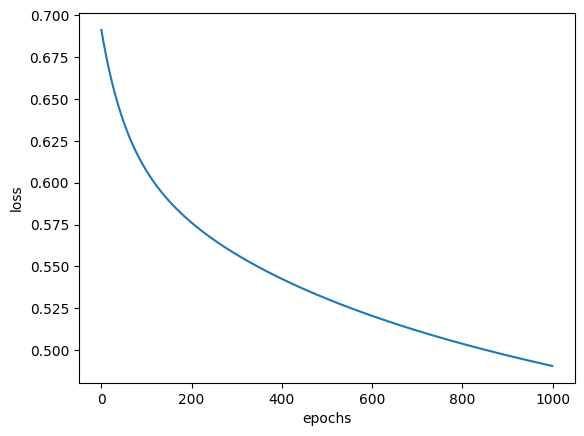

In [104]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(loss)

In [105]:
print(f"Final loss: {loss[-1]}")

Final loss: 0.49053260160519135


# **Đánh giá mô hình sau khi thêm bias**

In [106]:
y_pred = model.predict(X_test_scaled_bias,w)

In [107]:
evaluation(y_test_scaled,y_pred)

tp = 4495, tn = 4625, fp = 1216, fn = 1313
Accuracy = 0.7828998197270152
Precision = 0.7870775696025214
Recall = 0.7739325068870524
F1 Score = 0.7804496918135254
